<a href="https://colab.research.google.com/github/SheilaCFreitas/SheilaCFreitas/blob/main/Projeto_harve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### TRABALHO: SHEILA CRISTIANA DE FREITAS - Novembro de 2021


In [ ]:
# instalação e bibliotecas
!pip install pm4py
!pip install graphviz
import pandas as pd
import random
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import random
import numpy as np
eps = np.finfo(float).eps
from numpy import log2 as log
from pm4py.objects.log.util import dataframe_utils
from pm4py.objects.log.util import func as functools # Funções lambda

# nome do arquivo e identificadores de elementos do processo
filename = 'estudo_de_caso1.csv'

case_id='case_id'
activity_key='activity'
timestamp_key='timestamp'
lookup = 'estudo_de_caso1.csv'

     |████████████████████████████████| 1.7 MB 5.0 MB/s 
     |████████████████████████████████| 40.6 MB 1.7 MB/s 
  Created wheel for stringdist: filename=StringDist-1.0.9-cp37-cp37m-linux_x86_64.whl size=23596 sha256=0148b767eaa8d3694ff08d63ce5bdb9de62e44b3a0486c1b60ddcc03cae3835f
  Stored in directory: /root/.cache/pip/wheels/d7/9c/d4/63bc3d8931de0980b9e4a724dea290bb40b8b1b2bd6227c8da
Successfully built stringdist


*****
A mineração de processos é uma área de pesquisa que está relacionada a aprendizagem de máquina e mineração de dados. A ideia básica da Mineração de Processos é descobrir, monitorar e melhorar processos reais, extraindo conhecimentos de logs de eventos disponíveis em diversos sistemas de informação
*****



- Importando um log de eventos em formato CSV. 

- Fazendo a contagem de número de eventos e número de casos






In [ ]:
#Importa Log. Conta os casos e os eventos e mostra estrutura na tela

event_log = pd.read_csv('estudo_de_caso1.csv', sep = ';')

num_events = len(event_log)
num_cases = len(event_log.case_id.unique())
print("Total de eventos encontrados: {}\nTotal de casos encontrados: {}".format(num_events, num_cases))

event_log.head(20)

Total de eventos encontrados: 9119
Total de casos encontrados: 608


,case_id,timestamp,complete_timestamp,activity,resource,role
0,1,2011/01/01 00:00:00.000,2011/01/01 00:37:00.000,Create Purchase Requisition,Kim Passa,Requester
1,2,2011/01/01 00:16:00.000,2011/01/01 00:29:00.000,Create Purchase Requisition,Immanuel Karagianni,Requester
2,3,2011/01/01 02:23:00.000,2011/01/01 03:03:00.000,Create Purchase Requisition,Kim Passa,Requester
3,1,2011/01/01 05:37:00.000,2011/01/01 05:45:00.000,Create Request for Quotation,Kim Passa,Requester
4,1,2011/01/01 06:41:00.000,2011/01/01 06:55:00.000,Analyze Request for Quotation,Karel de Groot,Purchasing Agent
5,2,2011/01/01 08:16:00.000,2011/01/01 08:26:00.000,Create Request for Quotation,Alberto Duport,Requester
6,4,2011/01/01 08:39:00.000,2011/01/01 09:00:00.000,Create Purchase Requisition,Fjodor Kowalski,Requester
7,2,2011/01/01 09:34:00.000,2011/01/01 09:38:00.000,Analyze Request for Quotation,Karel de Groot,Purchasing Agent
8,5,2011/01/01 09:49:00.000,2011/01/01 10:35:00.000,Create Purchase Requisition,Esmana Liubiata,Requester
9,2,2011/01/01 10:16:00.000,2011/01/01 10:21:00.000,Amend Request for Quotation,Christian Francois,Requester


In [ ]:
def filtro_lamb():
  import pandas
  import pm4py
  event_log = pd.read_csv('estudo_de_caso1.csv', sep = ';')
  trace_log = functools.filter_(lambda t: len(t) > 5, event_log)
  print("\n  Type - Trace Log - - - - -\n")
  print(type(trace_log))
  print("\n  Trace Log- - - - - -\n")
  print(trace_log)
  for t in trace_log:
    print(t)

In [ ]:
filtro_lamb()


  - (2) - - - - - - - - - - - - - - - - - - - - - -

<class 'pandas.core.frame.DataFrame'>

  - (3) - - - - - - - - - - - - - - - - - - - - - -

      case_id                timestamp  ...             resource               role
0           1  2011/01/01 00:00:00.000  ...            Kim Passa          Requester
1           2  2011/01/01 00:16:00.000  ...  Immanuel Karagianni          Requester
2           3  2011/01/01 02:23:00.000  ...            Kim Passa          Requester
3           1  2011/01/01 05:37:00.000  ...            Kim Passa          Requester
4           1  2011/01/01 06:41:00.000  ...       Karel de Groot   Purchasing Agent
...       ...                      ...  ...                  ...                ...
9114     1284  2011/10/14 13:53:00.000  ...        Pedro Alvares  Financial Manager
9115     1448  2011/10/14 13:56:00.000  ...      Karalda Nimwada  Financial Manager
9116     1941  2011/10/14 14:05:00.000  ...       Karel de Groot   Purchasing Agent
9117     1448 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecatedWarning: filter_ is deprecated as of 2.1.3.1 and will be removed in 2.4.0. filter_() deprecated, use pm4py.filter_log() or pm4py.filter_trace() instead
  
/usr/local/lib/python3.7/dist-packages/pm4py/objects/log/util/func.py:47: UserWarning: input log object not of appropriate type, filter() not applied
  warnings.warn('input log object not of appropriate type, filter() not applied')


Funções que utilizam a biblioteca PM4PY para tranformar um arquivo .csv em um arquivo de log de eventos.


---



In [ ]:
import random
import numpy as np
eps = np.finfo(float).eps
from numpy import log2 as log
from pm4py.objects.log.util import dataframe_utils
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import math

#Funções

def dashboard(event_log, case_id, activity_key, timestamp_key):
  import pm4py
  event_log = pd.read_csv('estudo_de_caso1.csv', sep = ';')
  event_log = pm4py.format_dataframe(event_log, case_id='case_id', activity_key='activity',timestamp_key='timestamp', timest_format='%Y/%m/%d %H:%M:%S%z')
  
  dfg, start_activities, end_activities = pm4py.discover_dfg(event_log)
  pm4py.view_dfg(dfg, start_activities, end_activities)

  from pm4py.algo.discovery.inductive import algorithm as inductive_miner 
  #net, initial_marking, final_marking = inductive_miner.apply(event_log)

  from pm4py.visualization.petrinet import visualizer as pn_visualizer
  #gviz = pn_visualizer.apply(net, initial_marking, final_marking)
  #pn_visualizer.view(gviz)

  return event_log


def analisa_log(event_log, see_events):
  print("Quantidade de Linhas/registros x colunas:")
  print(event_log.shape)
      
  print('\n\nMapa do processo de descoberta:')
  event_log = dashboard(event_log, case_id, activity_key, timestamp_key)

  print("\n\n\nGera Árvore\n\n")

  import pm4py
  process_tree = pm4py.discover_tree_inductive(event_log)
  pm4py.view_process_tree(process_tree)





Quantidade de Linhas/registros x colunas
(9119, 6)


Mapa do processo de descoberta:


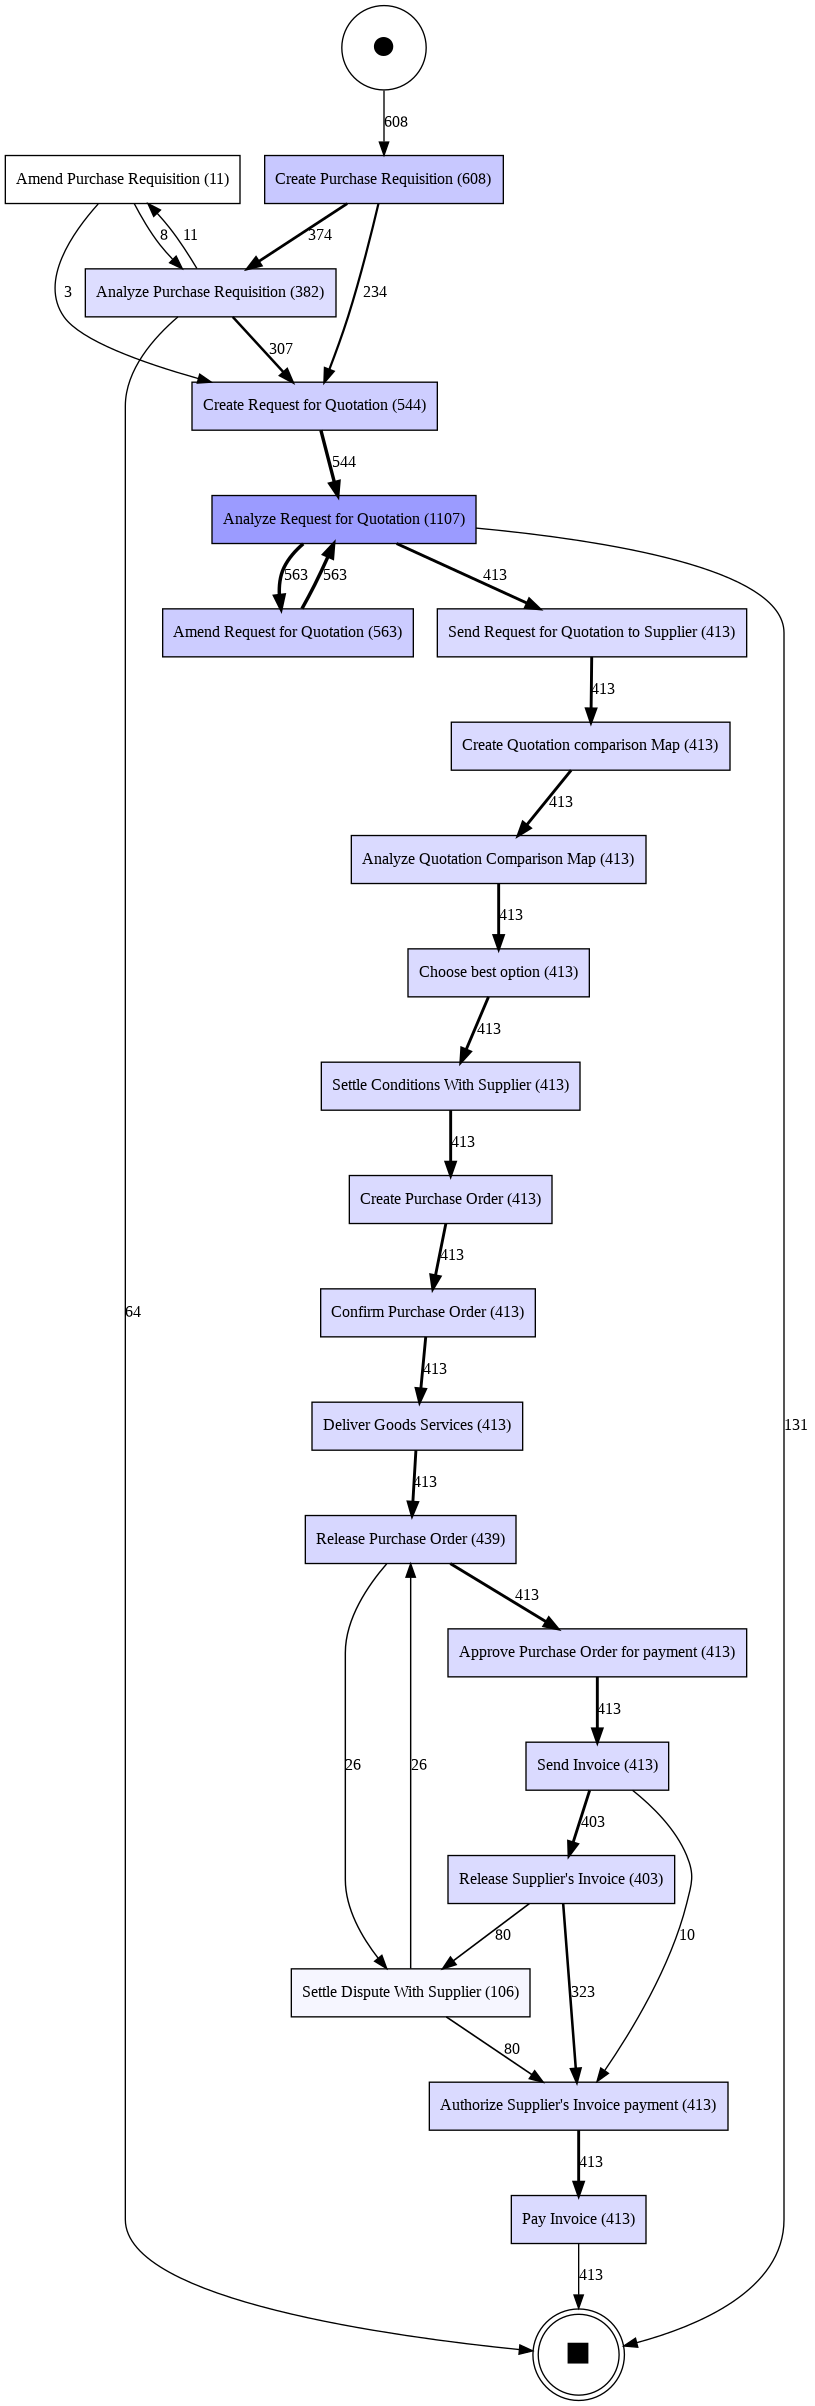




Gera Árvore




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: DeprecatedWarning: discover_tree_inductive is deprecated as of 2.2.2 and will be removed in 2.4.0. discover_tree_inductive is deprecated, use discover_process_tree_inductive


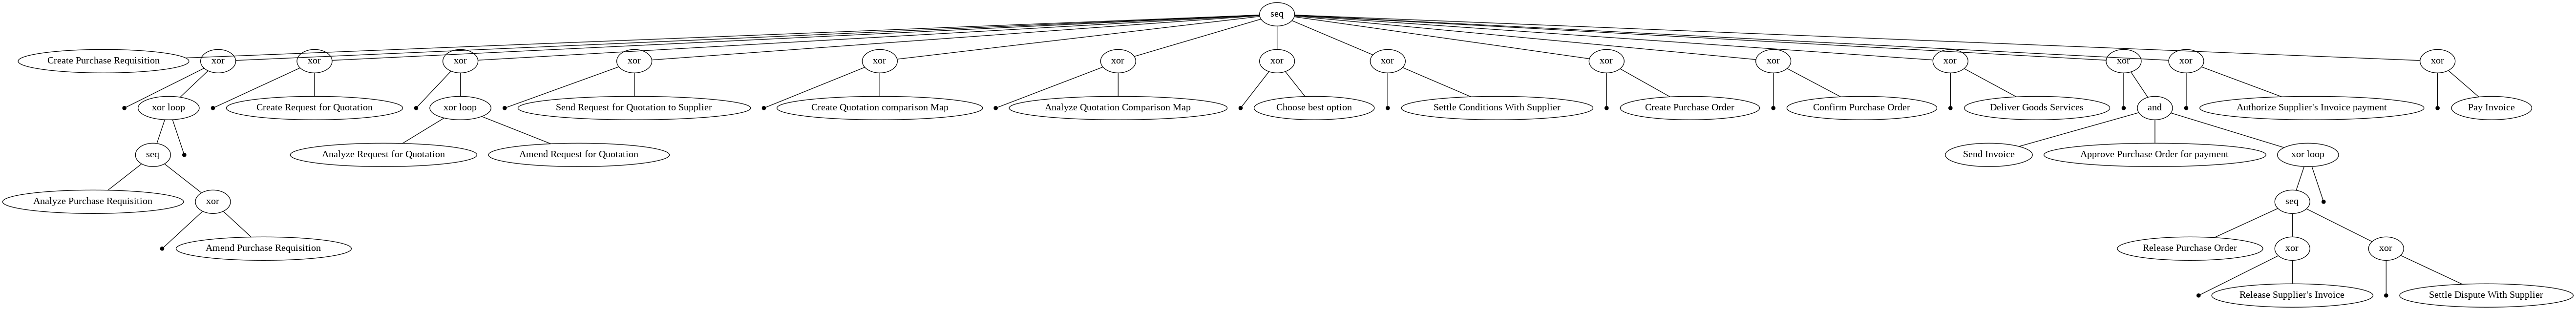

In [ ]:
# lendo log de eventos
event_log = pd.read_csv(filename, sep=';')
lookup_log = pd.read_csv(lookup, sep=';')

# filtros gerais

analisa_log(event_log, True)


In [ ]:
event_log.sort_values("case_id").head(50)


,case_id,timestamp,complete_timestamp,activity,resource,role
0,1,2011/01/01 00:00:00.000,2011/01/01 00:37:00.000,Create Purchase Requisition,Kim Passa,Requester
221,1,2011/01/04 00:54:00.000,2011/01/04 00:54:00.000,Send Invoice,Kiu Kan,Supplier
60,1,2011/01/02 09:58:00.000,2011/01/02 10:10:00.000,Create Purchase Order,Karel de Groot,Purchasing Agent
42,1,2011/01/02 01:22:00.000,2011/01/02 09:20:00.000,Settle Conditions With Supplier,Francois de Perrier,Purchasing Agent
37,1,2011/01/01 23:13:00.000,2011/01/01 23:13:00.000,Choose best option,Tesca Lobes,Requester
36,1,2011/01/01 22:44:00.000,2011/01/01 23:13:00.000,Analyze Quotation Comparison Map,Immanuel Karagianni,Requester
176,1,2011/01/03 19:09:00.000,2011/01/03 19:10:00.000,Approve Purchase Order for payment,Karel de Groot,Purchasing Agent
68,1,2011/01/02 14:09:00.000,2011/01/02 14:43:00.000,Confirm Purchase Order,Sean Manney,Supplier
276,1,2011/01/04 15:08:00.000,2011/01/04 15:13:00.000,Release Supplier's Invoice,Karalda Nimwada,Financial Manager
277,1,2011/01/04 15:13:00.000,2011/01/04 15:13:00.000,Authorize Supplier's Invoice payment,Karalda Nimwada,Financial Manager
